# Multiple Linear Regression Casestudy
## Bike Sharing Demand Prediction

### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. BoomBikes wante to understand the factors affecting the demand for these shared bikes in the American market. Objective of this casestudy to find the following - 

- Identify the variables which significant in predicting the demand
- Idenyify how well the significant variables are driving the demand

## Importing all necessary libraries

In [53]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Reading the dataset and analysing all the columns

In [109]:
#Reading dataset and printing first five rows
bike = pd.read_csv("D:/Upgrad/3. Machine Learning 1/Module 2 Linear Regression Assignment/day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [110]:
#Taking a look at the shape of the dataset
bike.shape

(730, 16)

In [111]:
#Looking at the dataset columns and it's type
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [112]:
bike = bike.drop(['instant', 'casual', 'registered'], axis=1)

In [113]:
#Creating summary of numeric variables
bike.describe(percentiles = [0.05,0.25,0.50,0.75,0.90,0.95,0.975,0.99])

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
5%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,8.747024,11.030712,40.741735,5.326052,1330.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
90%,4.000000,1.000000,11.000000,0.000000,6.000000,1.000000,2.000000,29.998347,33.908210,81.762500,19.833997,7293.800000
95%,4.000000,1.000000,12.000000,0.000000,6.000000,1.000000,2.000000,31.520460,35.749975,86.868735,22.999988,7576.400000


## From above dataset description we can see the following:
- Total observation available are 730
- Total number of variable are 16
- one missing value in hum column 
- Datatype of dteday as well as some of the categorical needs to changed
- Need to delete instant as it is an identifier
- Need to delete casual and registered as they are dependent on cnt target variable i.e. target variable can be derived using these two variables

# Data Exploration through Visualization

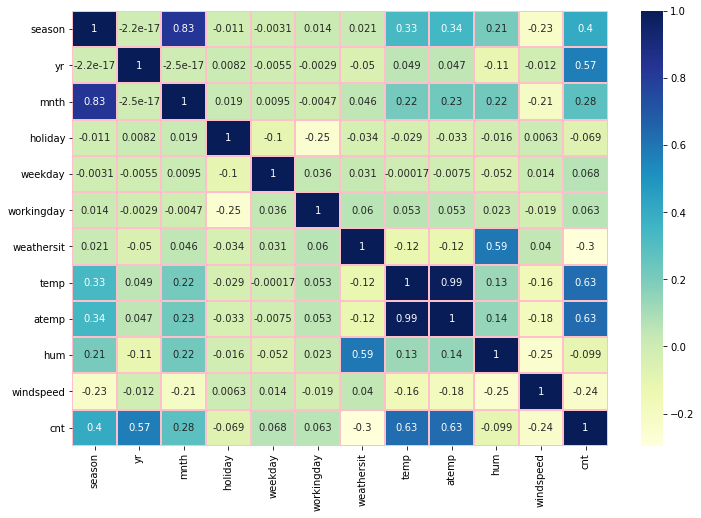

In [114]:
plt.figure(figsize=(12,8))
sns.heatmap(bike.corr(), annot=True, linewidths=1,linecolor='pink', cmap="YlGnBu")
plt.show()

## Noted down the following from heatmap above<br>
- There is high correlation between temp and atemp
- Target variable is highly correlated with temp 
- Windspeed and Humidity are negatively correlated with target variable
- High correlation between month and season
- Humidity and weather type have high correlation<br>

<Figure size 720x576 with 0 Axes>

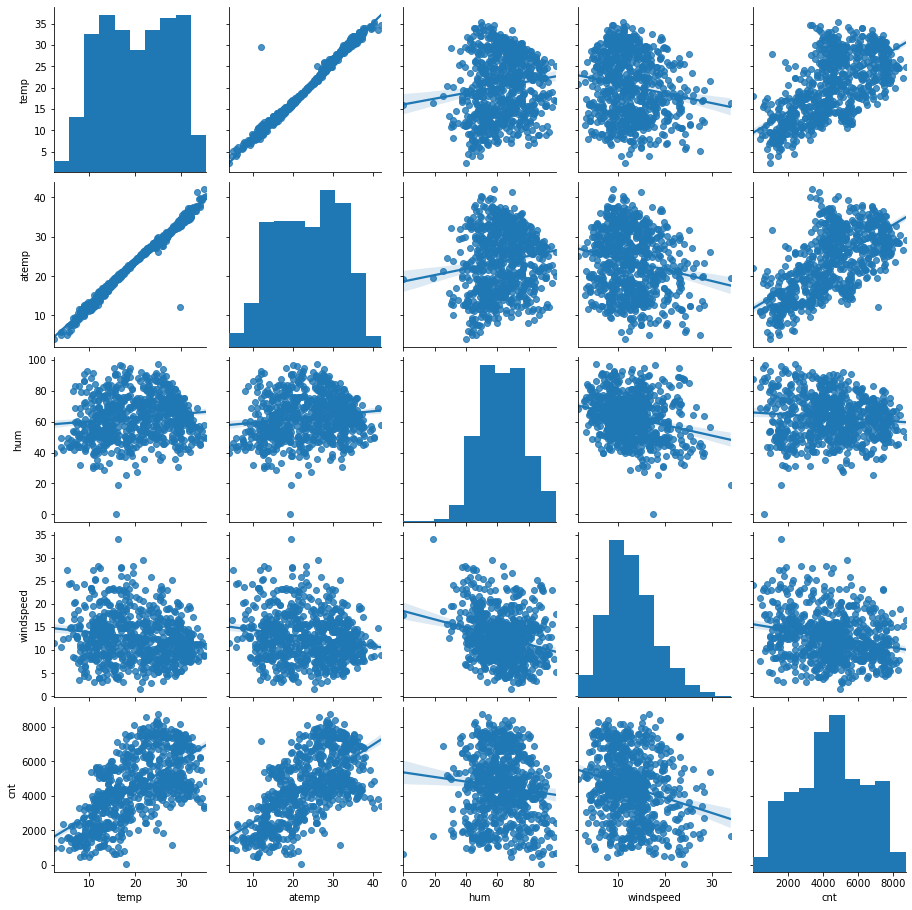

In [115]:
#Visualizing pairplot graph for univariate and bi-variate analysis of numeric predictors
plt.figure(figsize=(10,8))
sns.pairplot(bike, vars=['temp','atemp','hum', 'windspeed', 'cnt'], kind='reg')
plt.show()

## Following observations can be made from above pairplot<br>
- Both temp and atemp has strong positive correlation with target variable
- Both humidity and windspeed have weak negative correlation with target variable

## Labeling categorical variables for better understanding

In [116]:
#Changing datatype of dteday to datetime type
bike['dteday'] = bike['dteday'].apply(lambda x:datetime.strptime(x,"%d-%m-%Y"))

In [117]:
#Creating dictionary for labels of categorical variables
var_cat_cleanup = { 'season': {1:'spring', 2:'summer', 3:'fall', 4:'winter'},
                    'mnth' : {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June',
                             7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'},
                   'weekday' : {0:'Tue', 1:'Wed', 2:'Thur', 3:'Fri', 4:'Sat', 5:'Sun', 6:'Mon'},
                   'weathersit' : {1:'Clear/Partly cloudy', 2:'Mist or/and Cloudy', 3:'Light Snow', 4:'Heavy Rain'},
                   'yr': {0:'2018', 1: '2019'}
                    }

In [118]:
#Replacing the labels of the categorical variables where needed
bike.replace(var_cat_cleanup,inplace=True)

In [119]:
#Creating derived variable weekday type under assumption that customer behavior during weekend, 1 day before and after 
#weekend with comparison to all other weekdays will be different
bike['weekday_type']=bike['weekday'].map({'Sun': 'Weekend',
                     'Sat': 'Weekend',
                     'Mon' : '1Day B/F Weekend',
                     'Fri' : '1Day B/F Weekend',
                     'Tue': 'OtherDay',
                     'Wed': 'OtherDay',
                     'Thur': 'OtherDay'})

In [120]:
#Changing labels and type of categorical variables for easier interpretation and processing
bike.season = bike.season.astype('category')
#bike.mnth = bike.mnth.astype('category')
bike.mnth = pd.Categorical(bike['mnth'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June',
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
bike.weekday = bike.weekday.astype('category')
bike.weathersit = bike.weathersit.astype('category')
bike.yr = pd.Categorical(bike['yr'], categories=['2018','2019'], ordered=True)
#bike.holiday_season = pd.Categorical(bike['holiday_season'], categories=['0','1'])
bike.holiday = bike.holiday.astype('category')
bike.workingday = bike.workingday.astype('category')
bike.weekday_type = bike.weekday_type.astype('category')

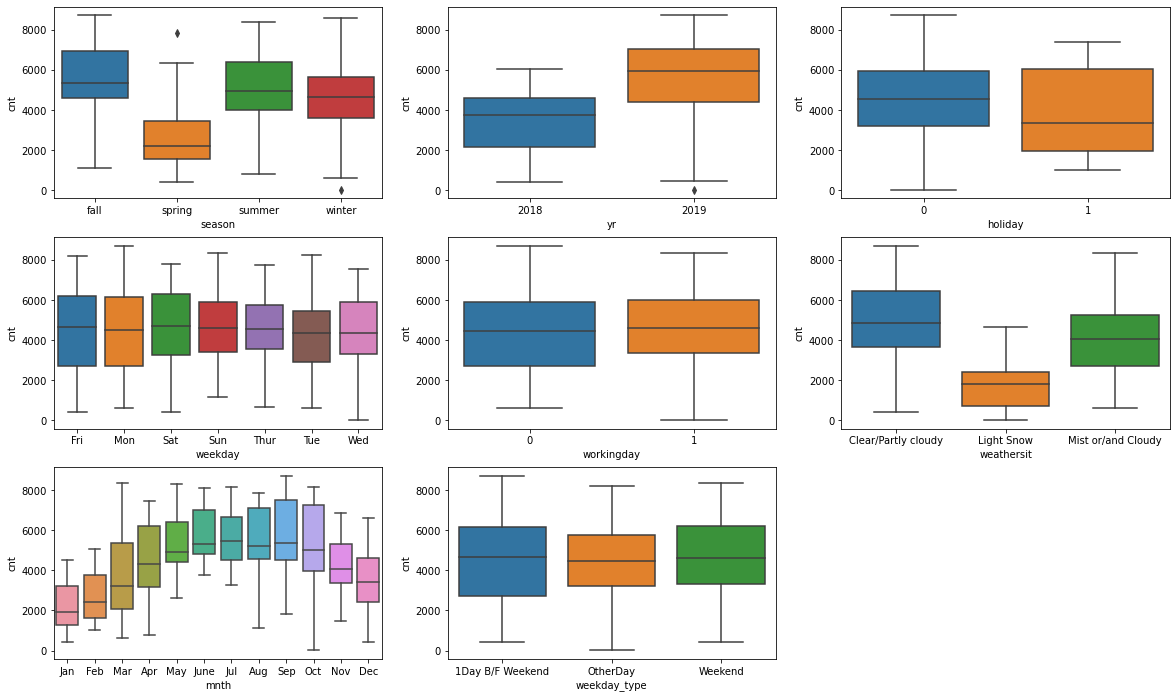

In [121]:
#Creating box plots for different categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(y='cnt', x='season', data=bike)
plt.subplot(3,3,2)
sns.boxplot(y='cnt', x='yr', data=bike)
plt.subplot(3,3,3)
sns.boxplot(y='cnt', x='holiday', data=bike)
plt.subplot(3,3,4)
sns.boxplot(y='cnt', x='weekday', data=bike)
plt.subplot(3,3,5)
sns.boxplot(y='cnt', x='workingday', data=bike)
plt.subplot(3,3,6)
sns.boxplot(y='cnt', x='weathersit', data=bike)
plt.subplot(3,3,7)
sns.boxplot(y='cnt', x='mnth', data=bike)
plt.subplot(3,3,8)
sns.boxplot(y='cnt', x='weekday_type', data=bike)
plt.show()

## Following insights can be made after observing above boxplot <br>
- Season, weather, mnth and year seems like good differentiator in terms rental volume for a given day
- Year 2019 show higher volume of rental since business is growing YoY
- Graph for rental volume during holiday pointed that usually more people use to rest at home versus people using rental service
- Graph also suggest people use rental service most in clear weather and least in thunderstorm or light snow<br>

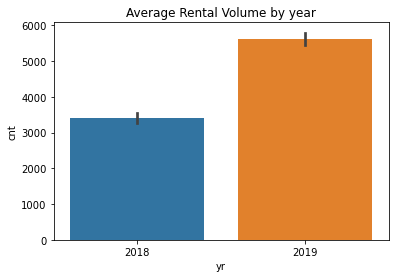

In [122]:
#Barplot of year and target variable
plt.title('Average Rental Volume by year')
sns.barplot(x='yr', y='cnt', data=bike)
plt.show()

## Above graph show clear pattern between rental volume with year<br>

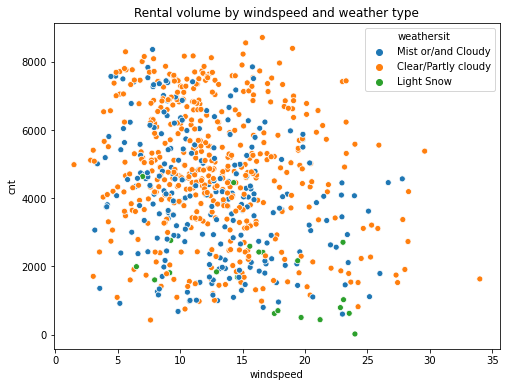

In [123]:
plt.figure(figsize=(8,6))
plt.title('Rental volume by windspeed and weather type')
sns.scatterplot(x='windspeed', y='cnt', data=bike, hue='weathersit')
plt.show()

## Customer tend to avail rental service more on clear weather and rental volume reduced with wind speed<br>

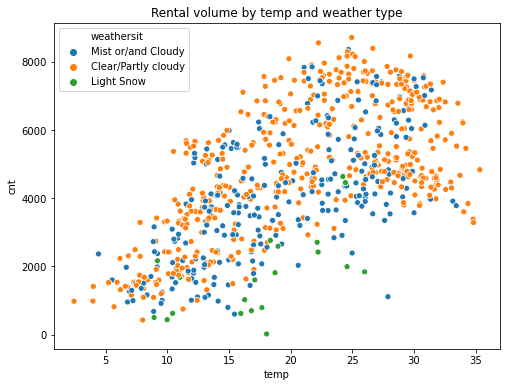

In [124]:
plt.figure(figsize=(8,6))
plt.title('Rental volume by temp and weather type')
sns.scatterplot(x='temp', y='cnt', data=bike, hue='weathersit')
plt.show()

## High Temperature with clear or cloudy weather leads to higher rental volume<br>

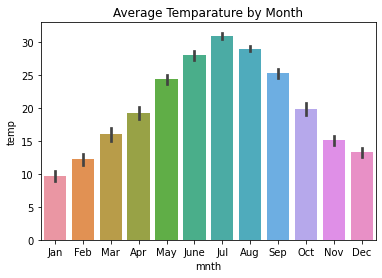

In [127]:
plt.title('Average Temparature by Month')
sns.barplot(x='mnth', y='temp', data=bike)
plt.show()

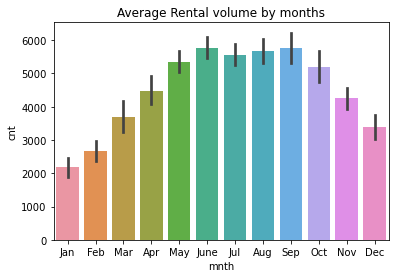

In [128]:
#Creating boxplot separately for weekday
plt.title('Average Rental volume by months')
sns.barplot(x='mnth', y='cnt', data=bike)
plt.show()

## Month and rental relation is similar to month and temperature relationship in above two graphs

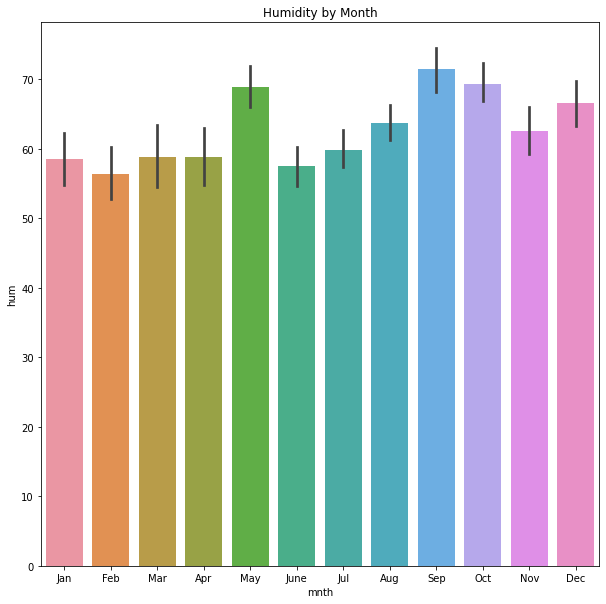

In [129]:
plt.figure(figsize=(10,10))
plt.title('Humidity by Month')
sns.barplot(x='mnth', y='hum', data=bike)
plt.show()

## No clear trend between month and humidity 

In [130]:
#dropping atemp as very highly correlated(99%) with temp
#dropping dteday as all date related variables are available
#dropping month as it is highly correlated with season(83%) and season having better correlation with target 
# variable(40%) than month(28%)
#dropping humidity as it is highly correlated with weathersit(59%) and weathersit having better correlation with 
# target variable(-20%) than month(-9%)
#Dropping weekday as we have created derived weekday type variable from it
bike = bike.drop(['atemp', 'dteday', 'mnth', 'hum', 'weekday'], axis=1)

## We have dropped one of the highly correlated variable out of two after comparing correlated variables relationship with target variable whichever of two have week relationship we dropped that variables

In [131]:
#checking shape of dataset after deletion
bike.shape

(730, 9)

# **Data Cleaning and Preparation** 

## Creating dummy variables for all dummy variables<br>

In [135]:
#Creating list of non numeric variables
nonum_var_list =bike.loc[:,bike.dtypes == 'category'].columns.to_list()
nonum_var_list

['season', 'yr', 'holiday', 'workingday', 'weathersit', 'weekday_type']

In [136]:
#Creating summary for non numeric variables
bike[nonum_var_list].describe()

,season,yr,holiday,workingday,weathersit,weekday_type
count,730,730,730,730,730,730
unique,4,2,2,2,3,3
top,fall,2019,0,1,Clear/Partly cloudy,OtherDay
freq,188,365,709,499,463,314


In [137]:
#Creating list of all the categorical variables
print(bike.loc[:,bike.dtypes == 'category'].columns.to_list())

#removing yr, holiday, workingday from the list as they already are encoded with two levels only
cat_var_list = [ 'season','weekday_type', 'weathersit', 'yr']

#creating dummy encoding for rest of the variables and check first few rows to ensure data is correctly created
cat_dummy = pd.get_dummies(bike[cat_var_list], drop_first=True)
cat_dummy.head()

['season', 'yr', 'holiday', 'workingday', 'weathersit', 'weekday_type']


,season_spring,season_summer,season_winter,weekday_type_OtherDay,weekday_type_Weekend,weathersit_Light Snow,weathersit_Mist or/and Cloudy,yr_2019
0,1,0,0,0,0,0,1,0
1,1,0,0,1,0,0,1,0
2,1,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0


In [138]:
#adding dummy data in original dataset
bike_1 = pd.concat([bike, cat_dummy], axis=1)
bike_1.head()

,season,yr,holiday,workingday,weathersit,temp,windspeed,cnt,weekday_type,season_spring,season_summer,season_winter,weekday_type_OtherDay,weekday_type_Weekend,weathersit_Light Snow,weathersit_Mist or/and Cloudy,yr_2019
0,spring,2018,0,0,Mist or/and Cloudy,14.110847,10.749882,985,1Day B/F Weekend,1,0,0,0,0,0,1,0
1,spring,2018,0,0,Mist or/and Cloudy,14.902598,16.652113,801,OtherDay,1,0,0,1,0,0,1,0
2,spring,2018,0,1,Clear/Partly cloudy,8.050924,16.636703,1349,OtherDay,1,0,0,1,0,0,0,0
3,spring,2018,0,1,Clear/Partly cloudy,8.200000,10.739832,1562,OtherDay,1,0,0,1,0,0,0,0
4,spring,2018,0,1,Clear/Partly cloudy,9.305237,12.522300,1600,1Day B/F Weekend,1,0,0,0,0,0,0,0


In [139]:
#dropping the variable from the dataset for which dummies are created 
bike_1 = bike_1.drop(cat_var_list, axis=1)

In [140]:
#Checking the shape of the dataset
bike_1.shape

(730, 13)

# Steps remaining in data preparation <br>
- Spliting source data in train & test dataset
- Scaling the variables which we will help us to determine key drivers of rental volume<br>

In [141]:
#Spliting dataset in source dataset in training and testing dataset
bike_train, bike_test  = train_test_split(bike_1, train_size=0.70, test_size=0.30, random_state=100)
bike_train.shape

(510, 13)

In [142]:
#Scaling the training dataset using mix max scaling so that result will be easier to interpret
all_col_list = bike_train.columns.to_list()
msc = MinMaxScaler()
bike_train[all_col_list] = msc.fit_transform(bike_train[all_col_list])

In [143]:
#Checking summary of the dataset to ensure scaling correctly done
bike_train.describe()

,holiday,workingday,temp,windspeed,cnt,season_spring,season_summer,season_winter,weekday_type_OtherDay,weekday_type_Weekend,weathersit_Light Snow,weathersit_Mist or/and Cloudy,yr_2019
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.320768,0.513620,0.243137,0.245098,0.24902,0.425490,0.260784,0.029412,0.343137,0.507843
std,0.157763,0.468282,0.225844,0.169797,0.224593,0.429398,0.430568,0.43287,0.494903,0.439494,0.169124,0.475223,0.500429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.735215,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Fitting and its summary analysis<br>
- create independent and dependent data 
- Add constant 
- Fitting linear regression model
- Checking model summary 

In [144]:
#Creating X and y sets from the training dataset
train_y = bike_train.pop('cnt')
train_X = bike_train

In [145]:
#Adding constant in the X set of training dataset
train_X_lm = sm.add_constant(train_X)

In [146]:
#Fitting the model using training dataset
LR = sm.OLS(train_y, train_X_lm).fit()
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.24e-182
Time:                        22:45:03   Log-Likelihood:                 488.87
No. Observations:                 510   AIC:                            -951.7
Df Residuals:                     497   BIC:                            -896.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2272      0.031      7.434      0.000       0.167       0.287
holiday                          -0.0632      0.028     -2.281      0.023      -0.118      -0.009
workingday                        0.0187      0.010      1.856      0.064      -0.001       0.039
temp                              0.4655      0.034     13.886      0.000       0.400       0.531
windspeed                        -0.1533      0.026     -5.977      0.000      -0.204      -0.103
season_spring                    -0.0825      0.021     -4.011      0.000      -0.123      -0.042
season_summer                     0.0376      0.014      2.714      0.007       0.010       0.065
season_winter                     0.0785      0.017      4.726      0.000       0.046       0.111
weekday_type_OtherDay            -0.0360      0.010     -3.592      0.000      -0.056      -0.016
weekday_type_Weekend             -0.0110      0.012     -0.906      0.365      -0.035       0.013
weathersit_Light Snow            -0.2879      0.025    -11.361      0.000      -0.338      -0.238
weathersit_Mist or/and Cloudy    -0.0781      0.009     -8.750      0.000      -0.096      -0.061
yr_2019                           0.2347      0.008     27.887      0.000       0.218       0.251
==============================================================================
Omnibus:                       64.323   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.697
Skew:                          -0.650   Prob(JB):                     2.10e-35
Kurtosis:                       5.414   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
#VIF Analysis of the predictor variables
vif = pd.DataFrame()
vif['Features'] = train_X.columns.to_list()
vif['VIF'] = [variance_inflation_factor(train_X.values, i) for i in range(train_X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by=['VIF'], ascending=False)
vif

,Features,VIF
2,temp,4.92
3,windspeed,4.61
1,workingday,3.89
7,weekday_type_OtherDay,2.40
4,season_spring,2.20
8,weekday_type_Weekend,2.19
11,yr_2019,2.07
5,season_summer,1.86
6,season_winter,1.76
10,weathersit_Mist or/and Cloudy,1.53


## Observation from above model created from all predictors<br>
- Model shows high R2 and adjusted R2
- Model is significant as proved by high P value of F statistics : 8.24e-182
- There are atleast 3 non significant variables exists in model as per the high P value 
- There are atleast 3 variable with VIF higher around 4 or higher

In [147]:
#Generating predicted value 
train_y_pred = LR.predict(train_X_lm)

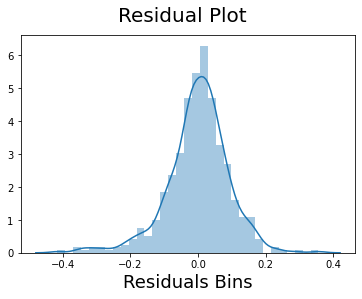

In [148]:
#Generating plot of residual to check assumptions
fig = plt.figure()
sns.distplot((train_y - train_y_pred))
fig.suptitle('Residual Plot', fontsize=20)
plt.xlabel('Residuals Bins', fontsize=18)
plt.show()

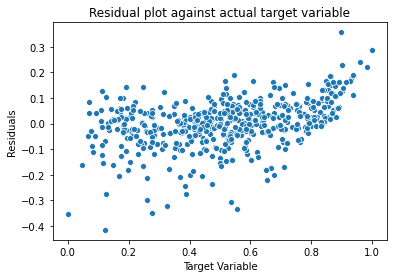

In [149]:
#Plot the residuals againt target values to look into the pattern in residuals
plt.title('Residual plot against actual target variable')
sns.scatterplot(train_y, (train_y - train_y_pred))
plt.xlabel('Target Variable')
plt.ylabel('Residuals')
plt.show()

## Upon doing the residual analysis we found<br>
- There slight pattern in residual as lower values of taget variable tend to give low error while higher target values give high error
- Distribution is almost normal with slight distortion at tales

In [150]:
#Defining custom function to remove one variable and generating model summary and VIF stats
def Model_rem_col(del_col_name, X_set):
    #Removing mnth_May variable from the dataset as it has very high P value
    rfe_col_list = set(X_set.columns.to_list()) - {del_col_name}
    
    #Fitting stats models linear regression model on selected predictors
    X_set = train_X[list(rfe_col_list)]

    #Adding constant in the predictor set
    train_X_rfe_lm = sm.add_constant(X_set)

    LR_rfe = sm.OLS(train_y, train_X_rfe_lm).fit()
    print(LR_rfe.summary())
    
    #Calculating VIF for selected predictors via RFE method
    vif = pd.DataFrame()
    vif['Columns'] =  X_set.columns.to_list()
    vif['VIF']  = [variance_inflation_factor( X_set.values , i) for i in range( X_set.shape[1])]
    vif = vif.sort_values('VIF', ascending=False)
    print(vif)  
    return X_set

## Observations from above model created from features exists in model
- temp,  windspeed and workingday have high VIF factor
- weekday_type_Weekend and workingday variable have high P value<br>

## Action Planned
- Removing variable with highest P value
- Recheck VIF values<br>

In [151]:
#Removing the predictor mnth_may from dataset and checking model summary and VIF stats
train_X_lm = Model_rem_col('weekday_type_Weekend', train_X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.18e-183
Time:                        22:51:24   Log-Likelihood:                 488.45
No. Observations:                 510   AIC:                            -952.9
Df Residuals:                     498   BIC:                            -902.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Observations from above model created from features exists in updated model
- temp and  windspeed have high VIF factor
- workingday variable have high P value<br>

## Action Planned
- Removing variable with highest P value
- Recheck VIF values<br>

In [152]:
#Removing the predictor humidity from dataset and checking model summary and VIF stats
train_X_lm = Model_rem_col('workingday', train_X_lm)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.92e-183
Time:                        22:53:08   Log-Likelihood:                 487.09
No. Observations:                 510   AIC:                            -952.2
Df Residuals:                     499   BIC:                            -905.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Observations from above model created from features exists in updated model
- temp and  windspeed have high VIF factor
- No variable have insignificant P value<br>

## Action Planned
- Removing variable with highest VIF factor
- Recheck VIF values<br>

In [153]:
#Removing the predictor humidity from dataset and checking model summary and VIF stats
train_X_lm = Model_rem_col('windspeed', train_X_lm)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     245.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.95e-177
Time:                        22:54:08   Log-Likelihood:                 469.10
No. Observations:                 510   AIC:                            -918.2
Df Residuals:                     500   BIC:                            -875.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Observations from above model created from features exists in updated model
- No variable have high VIF factor
- season_summer variable have high P value<br>

## Action Planned
- Removing variable with highest VIF factor
- Recheck VIF values<br>

In [154]:
#Removing the predictor humidity from dataset and checking model summary and VIF stats
train_X_lm = Model_rem_col('season_summer', train_X_lm)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     273.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.73e-177
Time:                        22:55:03   Log-Likelihood:                 467.27
No. Observations:                 510   AIC:                            -916.5
Df Residuals:                     501   BIC:                            -878.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Observations from above model created from features exists in updated model
- No variable have high VIF factor
- No variable have high P value<br>

## Action Planned
- Model is optimized and test the model on test dataset
- Check if R2 on test dataset is comparable to training set
- If difference between r2 of both the datasets are small then model is perfect otherwise model is overfittted

## Checking Assumptions on final selected model on training dataset

In [156]:
#Listing predictors selected by final model
train_X_lm.columns

Index(['holiday', 'season_spring', 'season_winter', 'weekday_type_OtherDay',
       'temp', 'weathersit_Light Snow', 'yr_2019',
       'weathersit_Mist or/and Cloudy'],
      dtype='object')

In [157]:
#Generating predicted value 
train_X_rfe_lm = sm.add_constant(train_X_lm)
train_X_rfe_lm

,const,holiday,season_spring,season_winter,weekday_type_OtherDay,temp,weathersit_Light Snow,yr_2019,weathersit_Mist or/and Cloudy
653,1.0,0.0,0.0,1.0,1.0,0.509887,0.0,1.0,0.0
576,1.0,0.0,0.0,0.0,1.0,0.815169,0.0,1.0,0.0
426,1.0,0.0,1.0,0.0,0.0,0.442393,0.0,1.0,1.0
728,1.0,0.0,1.0,0.0,1.0,0.245101,0.0,1.0,0.0
482,1.0,0.0,0.0,0.0,0.0,0.395666,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
526,1.0,0.0,0.0,0.0,1.0,0.824514,0.0,1.0,1.0
578,1.0,0.0,0.0,0.0,0.0,0.863973,0.0,1.0,0.0
53,1.0,0.0,1.0,0.0,0.0,0.202618,0.0,0.0,0.0
350,1.0,0.0,0.0,1.0,0.0,0.248216,0.0,0.0,1.0


In [158]:
LR_rfe = sm.OLS(train_y, train_X_rfe_lm).fit()
train_y_pred = LR_rfe.predict(train_X_rfe_lm)

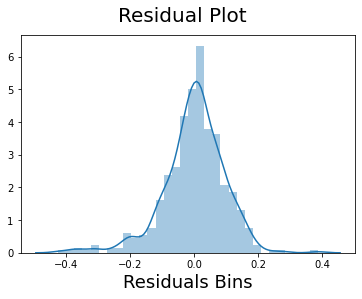

In [159]:
#Generating plot of residual to check assumptions
fig = plt.figure()
sns.distplot((train_y - train_y_pred))
fig.suptitle('Residual Plot', fontsize=20)
plt.xlabel('Residuals Bins', fontsize=18)
plt.show()

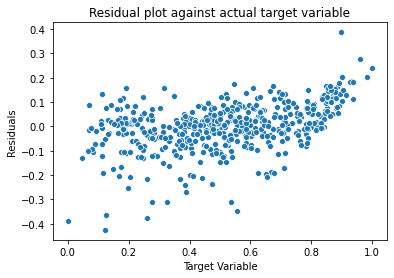

In [160]:
#Plot the residuals againt target values to look into the pattern in residuals
plt.title('Residual plot against actual target variable')
sns.scatterplot(train_y, (train_y - train_y_pred))
plt.xlabel('Target Variable')
plt.ylabel('Residuals')
plt.show()

## Upon doing the residual analysis we found<br>
- There slight pattern in residual as lower values of taget variable tend to give low error while higher target values give high error
- Distribution is almost normal with slight distortion at tales

# Testing the model prediction on test dataset

In [161]:
#Scaling the training dataset using mix max scaling so that result will be easier to interpret
all_col_list = bike_test.columns.to_list()


bike_test[all_col_list] = msc.transform(bike_test[all_col_list]) # use transform method instead of fit_transform
bike_test.head()

,holiday,workingday,temp,windspeed,cnt,season_spring,season_summer,season_winter,weekday_type_OtherDay,weekday_type_Weekend,weathersit_Light Snow,weathersit_Mist or/and Cloudy,yr_2019
184,1.0,0.0,0.831783,0.084219,0.692706,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
535,0.0,1.0,0.901354,0.153728,0.712034,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
299,0.0,1.0,0.511964,0.334206,0.303382,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
221,0.0,1.0,0.881625,0.339570,0.547400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,0.0,1.0,0.817246,0.537414,0.569029,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [162]:
#Creating X and y sets from the training dataset
test_y = bike_test.pop('cnt')
test_X = bike_test[train_X_lm.columns.to_list()]

#Adding constant in the X set of training dataset
test_X_lm = sm.add_constant(test_X)

#Checking testing dataset first few rows to ensure proper scalling is done
test_X_lm.head()


,const,holiday,season_spring,season_winter,weekday_type_OtherDay,temp,weathersit_Light Snow,yr_2019,weathersit_Mist or/and Cloudy
184,1.0,1.0,0.0,0.0,1.0,0.831783,0.0,0.0,1.0
535,1.0,0.0,0.0,0.0,0.0,0.901354,0.0,1.0,0.0
299,1.0,0.0,0.0,1.0,0.0,0.511964,0.0,0.0,1.0
221,1.0,0.0,0.0,0.0,0.0,0.881625,0.0,0.0,0.0
152,1.0,0.0,0.0,0.0,0.0,0.817246,0.0,0.0,0.0


In [104]:
#Predicting values on test dataset using final model selected on test dataset
test_y_pred = LR_rfe.predict(test_X_lm)

In [163]:
#Checking R2 values value for predicted values on test dataset
r2_score(test_y, test_y_pred)

0.8111453487430522

# Observations on Final Model<br>

- Missing value exists in humidity variable but we did not impute it because we dropped the variable before buiding the model
- We tried creating multiple derived variables such temp_to_hum, temp_to_windspeed and composite variable env_factor using temp, humidity and windspeed but all variable became insignificant in earlier iterations
- We made multiple iteration of the model to try different predictors with following assumptions/goals
>> 1. We wanted to keep r2 of test and training dataset as close as possible
>> 2. Through multiple iteration we found optimal split between testing and training is 30%/70%
>> 3. We deleted one of the two correlated variables to reduce multi collinearity later in the model
>>> a. we dropped one of multi collinear variable with had less correlation with target variable
>> 4. We did not observed outlier in any of the numeric/continuous variables 
>> 5. We chose to create linear model with statsmodels.api as we wanted to interpret the model coefficient and we normalized the predictors so that we simply look at the absolute value of predictor coefficient in order to find out most significant predictors
- We got a very good model with decent R2 (training : 81.4 and testing : 81.1)<br>